# BayWheel Bike Data Visualziation

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import datetime
%matplotlib inline

In [237]:
# import all the csv files
files = ['201801-fordgobike-tripdata.csv', '201802-fordgobike-tripdata.csv',
        '201803-fordgobike-tripdata.csv','201804-fordgobike-tripdata.csv',
        '201805-fordgobike-tripdata.csv','201806-fordgobike-tripdata.csv',
        '201807-fordgobike-tripdata.csv','201808-fordgobike-tripdata.csv',
        '201809-fordgobike-tripdata.csv','201810-fordgobike-tripdata.csv',
        '201811-fordgobike-tripdata.csv','201812-fordgobike-tripdata.csv']

In [238]:
# loop through the file directory, append each file to the dataframe then reset the index 
df = pd.DataFrame()
for file in files:
    if df.empty:
        df = pd.read_csv(file)
    else:
        new_df = pd.read_csv(file)
        df = pd.concat([df, new_df], ignore_index=True)
df.reset_index()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [240]:
df.shape

(1863721, 16)

In [241]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [242]:
df.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

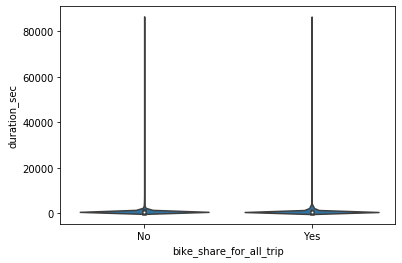

In [243]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x="bike_share_for_all_trip", y="duration_sec", color=base_color)

In [250]:
# derive the time duration in terms of minute and hour from duration_sec
df['duration_min'] = df['duration_sec'].apply(lambda d: d/60).astype(float)
df['duration_hr'] = df['duration_min'].apply(lambda d: d/60).astype(float)

In [251]:
# round to 2 decimals 
df['duration_min'] = df['duration_min'].apply(lambda x: round(x, 2))
df['duration_hr'] = df['duration_hr'].apply(lambda x: round(x, 2))

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.73,20.91
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.70,23.73
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.93,19.88
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,1017.93,16.97
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.10,11.10


(array([207573., 563100., 442801., 264987., 147089.,  79952.,  46771.,
         28072.,  15769.,  11467.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

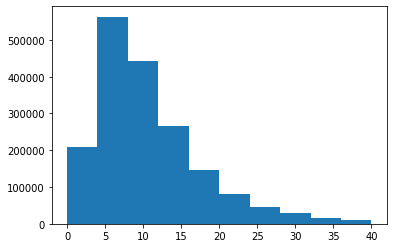

In [257]:
plt.hist(df.duration_min, range=[0,40])

In [259]:
# derive the age from members' birth year
df['member_age'] = df['member_birth_year'].apply(lambda b:0 if pd.isnull(b) else 2019-b).astype(int)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,member_age
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.73,20.91,33
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.70,23.73,0
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.93,19.88,23
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,1017.93,16.97,0
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.10,11.10,28


In [261]:
# make a copy of the data frame for further exploration
dfc = df.copy()

In [262]:
# convert end_time column to datetime type
dfc['end_time'] = pd.to_datetime(dfc['end_time'])

In [263]:
# extract month, date, day, and hour from the end_time column utilizing the datetime library
dfc['month'] = dfc['end_time'].apply(lambda time: time.strftime("%B"))
dfc['date'] = dfc['end_time'].apply(lambda time: time.strftime("%d"))
dfc['day'] = dfc['end_time'].apply(lambda time: time.strftime("%A"))
dfc['hour'] = dfc['end_time'].apply(lambda time: time.strftime("%H"))

In [265]:
# assign a certain day to weekday/weekend
def assign_weektime(day):
    weekdays = ['Monday','Tuesday', 'Wednesday','Thursday','Friday']
    weekend = ['Saturday', 'Sunday']
    if day in weekdays:
        return "Weekday"
    else:
        return "Weekend"

In [266]:
dfc['timeofweek'] = dfc['day'].apply(lambda day: assign_weektime(day))

In [267]:
dfc.timeofweek.value_counts()

Weekday    1534326
Weekend     329395
Name: timeofweek, dtype: int64

In [268]:
dfc['hour'] = dfc['hour'].astype(int)

In [269]:
# assign a specific time period of the day (morning, afternoon, evening)
def assign_dayperiod(hour):
    if (hour >= 4 and hour <= 12):
        return "Morning"
    elif (hour > 12 and hour <= 18):
        return "Afternoon"
    else:
        return "Evening"

In [270]:
dfc['dayperiod'] = dfc['hour'].apply(lambda hour: assign_dayperiod(hour))

In [271]:
dfc.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,duration_hr,member_age,month,date,day,hour,timeofweek,dayperiod
286524,1043,2018-03-08 17:13:06.0670,2018-03-08 17:30:29.632,37.0,2nd St at Folsom St,37.785000,-122.395936,55.0,Webster St at Grove St,37.777053,...,No,17.38,0.29,47,March,08,Thursday,17,Weekday,Afternoon
998314,1449,2018-07-04 18:58:58.6020,2018-07-04 19:23:07.651,350.0,8th St at Brannan St,37.771431,-122.405787,6.0,The Embarcadero at Sansome St,37.804770,...,No,24.15,0.40,26,July,04,Wednesday,19,Weekday,Evening
738890,328,2018-06-13 17:10:04.8460,2018-06-13 17:15:33.730,337.0,Webster St at 19th St,37.806970,-122.266588,7.0,Frank H Ogawa Plaza,37.804562,...,No,5.47,0.09,70,June,13,Wednesday,17,Weekday,Afternoon
1059438,713,2018-08-25 02:37:53.4770,2018-08-25 02:49:46.598,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,273.0,Fulton St at Ashby Ave,37.855574,...,No,11.88,0.20,23,August,25,Saturday,2,Weekend,Evening
1858742,167,2018-12-02 21:09:40.0430,2018-12-02 21:12:27.705,368.0,Myrtle St at Polk St,37.785434,-122.419622,58.0,Market St at 10th St,37.776619,...,No,2.78,0.05,37,December,02,Sunday,21,Weekend,Evening


In [272]:
# assign age group to the users
def assign_agegroup(age):
    if (age >= 0 and age <=10):
        return "Children"
    elif (age > 10 and age <=20):
        return "Teen"
    elif (age > 20 and age <=35):
        return "Young Adult"
    elif (age > 35 and age <=55):
        return "Adult"
    else:
        return "Senior"

In [273]:
dfc['member_age_group'] = dfc['member_age'].apply(lambda age: assign_agegroup(age))

In [274]:
dfc.member_age_group.value_counts()

Young Adult    1003679
Adult           628064
Children        110718
Senior          102522
Teen             18738
Name: member_age_group, dtype: int64

### Average Trip Duration by Age Group

In [197]:
age_order = ['Children', 'Teen', 'Young Adult', 'Adult', 'Senior']
age_range = [0, 10, 20, 35, 55, 120]

(0, 100)

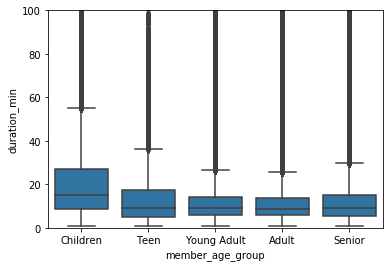

In [293]:
sb.boxplot(data=dfc, x="member_age_group", y="duration_min", color=base_color, order=age_order)
plt.ylim(0,100)

In [294]:
dfc_byAge = dfc.loc[dfc.member_age != 0].reset_index()

In [295]:
# bin_edges = np.arange(0, dfc['member_age'].max() + 10, 10)
# bin_idxs = pd.cut(dfc['member_age'], bin_edges, right=False, include_lowest=False).astype(int)
bin_idxs = pd.cut(dfc_byAge['member_age'], age_range, labels=age_order)

In [296]:
dfc_byAge.head()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,duration_min,duration_hr,member_age,month,date,day,hour,timeofweek,dayperiod,member_age_group
0,0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,...,1254.73,20.91,33,February,01,Thursday,19,Weekday,Evening,Young Adult
1,2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,...,1192.93,19.88,23,February,01,Thursday,10,Weekday,Morning,Young Adult
2,4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,...,666.10,11.10,28,February,01,Thursday,6,Weekday,Morning,Young Adult
3,6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,...,7.55,0.13,31,February,01,Thursday,0,Weekday,Evening,Young Adult
4,7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,...,3.00,0.05,39,January,31,Wednesday,23,Weekday,Evening,Adult


In [298]:
# pts_per_bin = dfc.groupby(bin_idxs).size()
# num_var_wts = dfc['duration_min'] / pts_per_bin[bin_idxs].values
# plt.hist(data=dfc, x='member_age', bins=bin_edges, color=base_color)

### Q1: When does people usually like to bike?
#### Weekend/Weekday
#### Morning/Afternoon/Evening
#### Month (January through December)

First of all, we'd like to figure out when people like to bike around in different metrics. That'd be useful to build a pattern that would help better distributing the bikes based on demand of different time periods.

We'll start off by weekday/weekend.

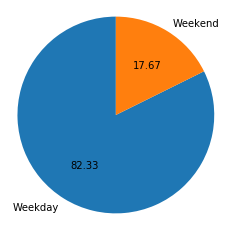

In [291]:
timeofweek_counts = dfc.timeofweek.value_counts()
plt.pie(timeofweek_counts, labels=timeofweek_counts.index, startangle=90, autopct=lambda val: val.round(2));
plt.axis('square');

Apparently, the majority of the bikes ride on the weekday. Do they bike to commute or just for fun? Maybe taking a look at the day period (morning/afternoon/evening) distribution would help us determine.

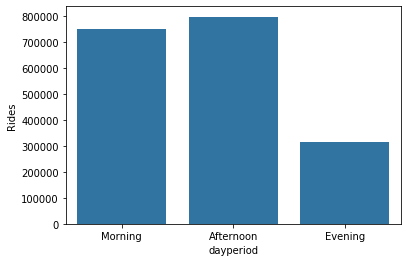

In [308]:
dayperiod_order = ['Morning', 'Afternoon', 'Evening']
sb.countplot(data=dfc, x="dayperiod", color=base_color, order=dayperiod_order);
plt.ylabel('Rides');
plt.title('Ride Distribution in Day Periods');

Maybe they do bike for commuting as the majority of rides takes place during morning and afternoon. To confirm, let's dive deep and take a look at the hourly distribution.

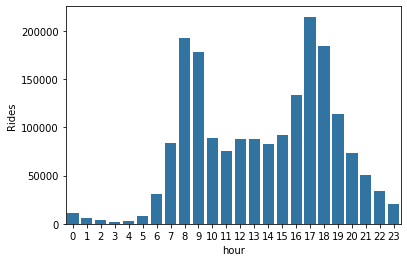

In [309]:
hour_order = np.arange(0, 24, 1)
sb.countplot(data=dfc, x="hour", color=base_color, order=hour_order);
plt.ylabel('Rides');
plt.title('Hourly Ride Distribution');

It might actually be the case. As we can see from the bar chart, the peak traffic is around 7-9 (morning commute) and 16-18 (afternoon commute(). There's a consistent traffic in between the two peaks, and after 7pm traffic starts to go down.

Now let's examine the data set from the month's perspective. In which month do people bike the most? Let's find out by building a barplot based on month.

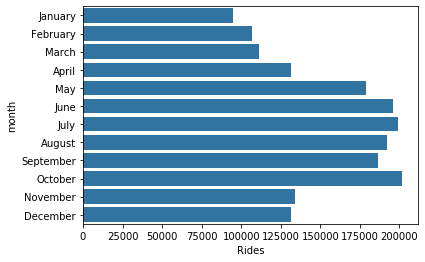

In [312]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(data=dfc, y="month", color=base_color, order=month_order);
plt.xlabel('Rides');
plt.title('Monthly Ride Distribution');

To better display the month labels, I've set the barplot to be horizontal. Here we could see that apparently people like to bike in summer and fall - especially in the months from May to October. It makes sense because the weather during that those seasons are more ideal for biking.

Now that we've examined the data from a chronological standpoint, let's switch gears and try to play around with demographic attributes. Nos vamos!

### Q2: Who likes to ride a bike the most?
#### Age group (decades)
#### Gender
#### User Type (Subscriber/Customer)

We would like to start off with some usual univariate analysis. Let's take a look at the age group - do older people prefer to bike than the younger people? 

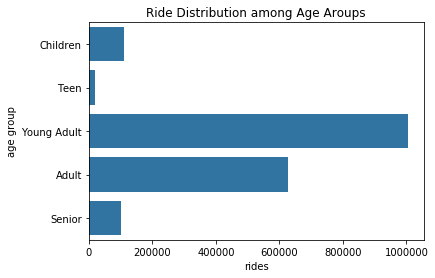

In [337]:
age_order = ['Children', 'Teen', 'Young Adult', 'Adult', 'Senior']
sb.countplot(data=dfc, y="member_age_group", color=base_color, order=age_order);
plt.xlabel('rides');
plt.ylabel('age group');
plt.title('Ride Distribution among Age Aroups');

This categorization might be a bit general. What if we break down the age by range of 10?

In [332]:
bin_edges = np.arange(0, dfc.member_age.max(), 10)
dfc['age_by_10'] = pd.cut(dfc.member_age, bin_edges, right=False)

In [327]:
bin_edges.shape

(14,)

Text(0.5, 1.0, 'Ride distribution among age groups, range of 10')

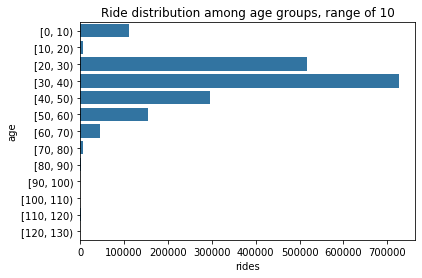

In [336]:
sb.countplot(data=dfc, y="age_by_10", color=base_color);
plt.xlabel('rides');
plt.ylabel('age');
plt.title('Ride Distribution among Age Aroups, range of 10');

As we could see from above, most riders fall into the range of 20-50, which makes sense. Let's now try a bivariate visualization. What's the relationship between trip duration and age group? For the sake of simplicity, we'll use the duration in minute as our metric.

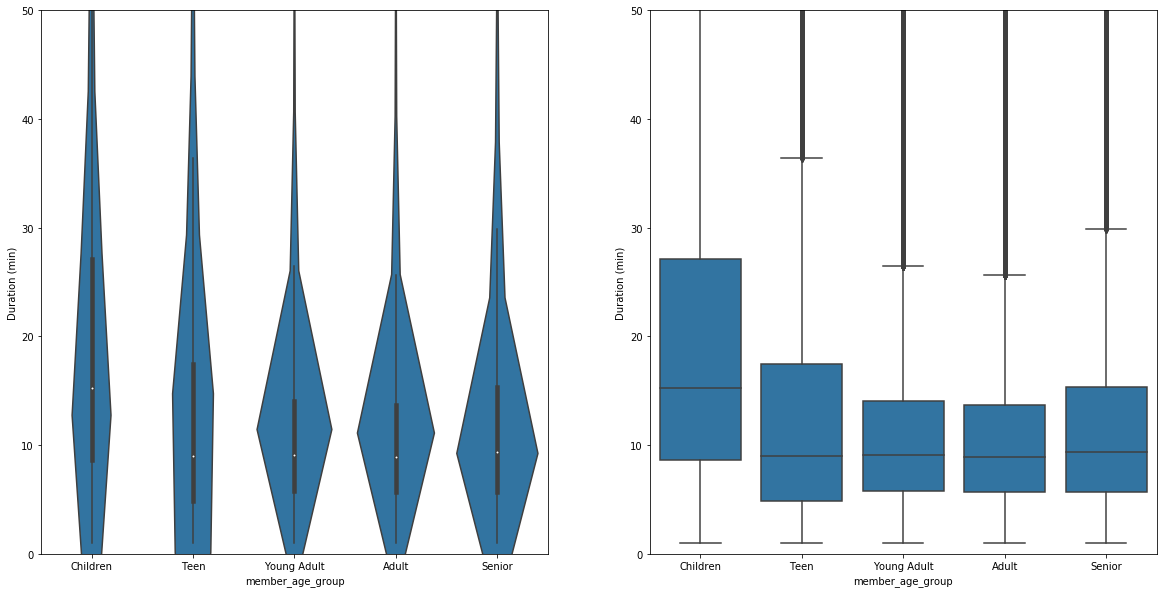

In [340]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=dfc, x="member_age_group", y="duration_min", color=base_color, order=age_order)
plt.ylim(0, 50);
plt.ylabel("Duration (min)")

plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=dfc, x="member_age_group", y="duration_min", color=base_color, order=age_order)
plt.ylabel("Duration (min)");
plt.ylim(0, 50);

As we could see, surprisingly children seem to have the longest duration. However as we recall for a lot the records that don't have a birth year, we simply assign their age to be 0. Let's clean it up and run the plots again. 

In [343]:
dfc.query('member_age == 0').count()['bike_id']

110718

In [344]:
dfc_by_age = dfc.loc[dfc.member_age != 0]

In [347]:
dfc_by_age.member_age_group.value_counts()

Young Adult    1003679
Adult           628064
Senior          102522
Teen             18738
Name: member_age_group, dtype: int64

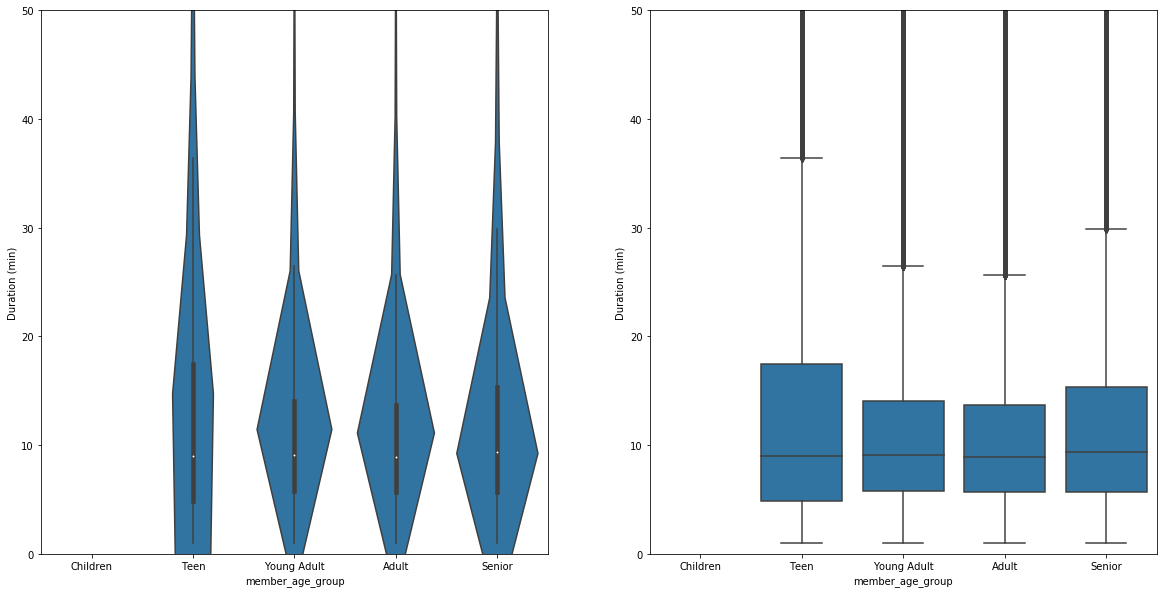

In [348]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=dfc_by_age, x="member_age_group", y="duration_min", color=base_color, order=age_order)
plt.ylim(0, 50);
plt.ylabel("Duration (min)")

plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=dfc_by_age, x="member_age_group", y="duration_min", color=base_color, order=age_order)
plt.ylabel("Duration (min)");
plt.ylim(0, 50);

Hmm, that makes a difference. Now the children group is completely gone - and teens take the lead among all age groups. Surprisingly, the seniors come nextm trailing by a small margin.

Next, let's examine the distribution between user types (subscriber/customer)

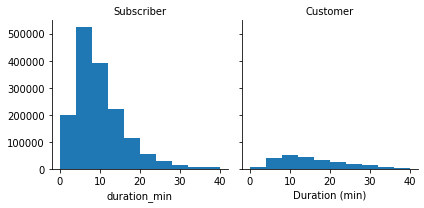

In [354]:
g = sb.FacetGrid(data=dfc, col="user_type");
g.map(plt.hist, "duration_min", range=[0,40]);
g.set_titles('{col_name}');
plt.xlabel('Duration (min)');

As we could see, the majority of users are subscribers while just a small portion of users are occasional customers. For both groups, most data points fall into the range of 0-20 minutes. Nevertheless, the spread of subscribers is much greater than the customers, which is comparatively more even-out. For subscribers, the bulk of the data points of subscribers fall in 5-15 minutes.

### Q3: Does people like to share a bike?
#### bike_share_for_all_trip	

### Q4: In which area does people bike the most?
#### Station name
#### Longitude, Latitude
#### City/State derived from lon/lat? (if time permits)